# Unbiasing COVID-19 Case Count
Kartik Chugh - May 3, 2020

 <img src="china-data.png" />

In [332]:
import numpy as np
import pandas as pd
from pandas import Timestamp
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.3f}'.format})

In [279]:
ONSET_TO_DEATH = 17 # https://midasnetwork.us/covid-19/
MORTALITY_RATE = 0.01 * 10
#DOUBLING_TIME = 2.5

In [301]:
url = 'https://covidtracking.com/api/v1/us/daily.csv'
df = pd.read_csv(url, 
            usecols=['date', 'positiveIncrease', 'deathIncrease', 'positive'], 
            parse_dates=['date'], 
            index_col=['date']).sort_index().iloc[31:]

In [302]:
pd.set_option('display.max_rows', None)
df

,positive,deathIncrease,positiveIncrease
date,,,
2020-02-22,2,0.0,0.0
2020-02-23,2,0.0,0.0
2020-02-24,2,0.0,0.0
2020-02-25,2,0.0,0.0
2020-02-26,2,2.0,0.0
2020-02-27,2,0.0,0.0
2020-02-28,9,2.0,7.0
2020-02-29,18,1.0,9.0
2020-03-01,40,3.0,22.0


In [409]:
def doublingTime(a, b):
    return np.log(2)/(np.log(b/a)) if (a != b) else NaN

doubling = np.empty(df['positive'].shape)
for t_2 in range(1, len(doubling)):
    q_2 = df['positive'][t_2]
    q_1 = df['positive'][t_2-1]
    doubling[t_2] = doublingTime(q_1, q_2)
    
smooth = pd.Series(doubling).rolling(10,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()

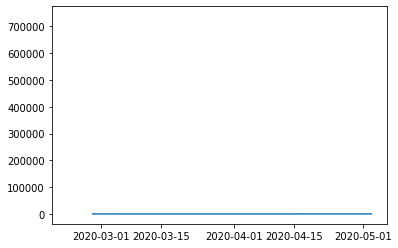

In [410]:
plt.plot(df.index, doubling)

In [282]:
firstDeathDate = data['deathIncrease'].ne(0).idxmax()
#firstDeathDate = Timestamp('2020-03-15')
firstDeathDate

Timestamp('2020-02-26 00:00:00')

In [283]:
daysLeft = (data.index[-1] - firstDeathDate).days
daysLeft

67

In [284]:
firstDeathCount = data['deathIncrease'][firstDeathDate]
firstDeathCount

2.0

In [285]:
firstTrueCaseDate = firstDeathDate - timedelta(days = ONSET_TO_DEATH)
firstTrueCaseDate

Timestamp('2020-02-09 00:00:00')

In [286]:
firstTrueCaseCount = firstDeathCount / MORTALITY_RATE
firstTrueCaseCount

20.0

In [288]:
trueCaseCounts = np.logspace(1/DOUBLING_TIME, daysLeft/DOUBLING_TIME, base=2, num=daysLeft)*firstTrueCaseCount

In [289]:
new = pd.DataFrame(data=trueCaseCounts, index=data.index[-daysLeft:])

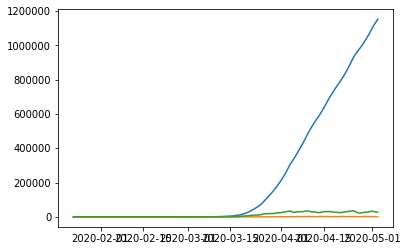

In [294]:
plt.plot(data)